### k-Nearest Neighbors

#### References:
- [kNN Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Algorithm)
- [Scikit-learn kNN](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

<a href="https://colab.research.google.com/github/paulaceccon/dl-from-scratch/blob/main/notebooks/dnn_tensorflow.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

%matplotlib inline

In [2]:
iris = datasets.load_iris()

# We only take the first two features (for visualization purposes). 
# We could avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [3]:
X_test = np.array([
    [5.0, 2.15],
    [5.3, 2.5],
    [6.3, 3.0],
    [7.0, 4.0],
    [5.0, 4.0]
])
y_test = [
    1, # versicolor
    1, # versicolor
    1, # versicolor
    2, # virginica
    0, # setosa
]

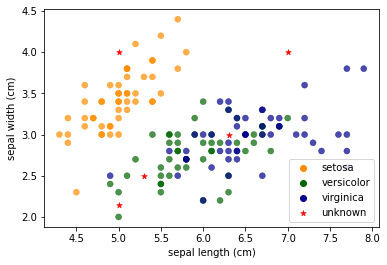

In [4]:
# Create color maps
cmap_light = ListedColormap(["moccasin", "lightgreen", "lightblue"])
cmap_bold = {"setosa":"darkorange", "versicolor": "darkgreen", "virginica": "darkblue"}

# Input data
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=0.7,
    edgecolor=None,
)
# To predict
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    alpha=1.0,
    edgecolor=None,
    marker="*",
    label="unknown",
    color="red"
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [5]:
class KNeighborsClassifier:
    """
    Implements a basic knn classifier.
    
    Args:
        n_neighbors: number of closest neighbors to consider.
    """
    
    def __init__(self, n_neighbors: int = 3):
        self._k: int = n_neighbors
        self._X: np.ndarray = None
        self._y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Fit the k-nearest neighbors classifier from the training dataset."""
        self._X = X
        self._y = y
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class labels for the provided data.
        
        Algorithm:
            1. Calculate the euclidian distance between each fitted element 
                and the ones we want to predict.
            2. Order the distances in ascending order, retrieving the closest
                neighbors.
            3. Get the labels of the closests neighbors.
            4. Get the majority label of the closest neighbors for each element
                we want a prediction for.
        
        Returns:
            Class labels predictions.
        """
        rows = X.shape[0] 
        distances = np.array([self._distance(X[row, :]) for row in range(rows)])
        nn_ids = distances.argsort(axis=1)[:, :self._k]
        nn_y = y[nn_ids]
        
        y_preds = []
        for row in range(rows):
            values, counts = np.unique(nn_y[row], return_counts=True)
            y_preds.append(values[np.argmax(counts)])
            
        return np.array(y_preds)
        
    def _distance(self, x: np.ndarray) -> float:
        """
        Calculates the euclidian distance between fitted elements and 
        a given point.
        
        Args:
            x: point in n-d space.
            
        Returns:
            Euclidian distance to each fitted point.
        """
        return np.linalg.norm(self._X - x, axis=1)

In [6]:
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X, y)

In [7]:
y_pred = clf.predict(X_test)

#### Decision Boundary Visualization

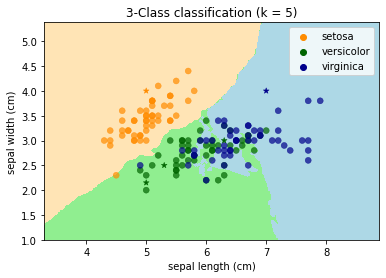

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=0.7,
    edgecolor=None,
)
# Plot the test points
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=iris.target_names[y_pred],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor=None,
    marker="*",
    legend=False
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0